# Positional Encoding in Action

In [3]:
# !pip install seaborn

In [6]:
import torch
import math
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertModel, BertTokenizer, BertConfig

sns.set(style="whitegrid")

In [7]:
def positional_encoding(max_len=50, d_model=64):
    PE = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

    PE[:, 0::2] = torch.sin(position * div_term)  # Sine on even dims
    PE[:, 1::2] = torch.cos(position * div_term)  # Cosine on odd dims
    
    return PE

PE = positional_encoding()
PE.shape

torch.Size([50, 64])

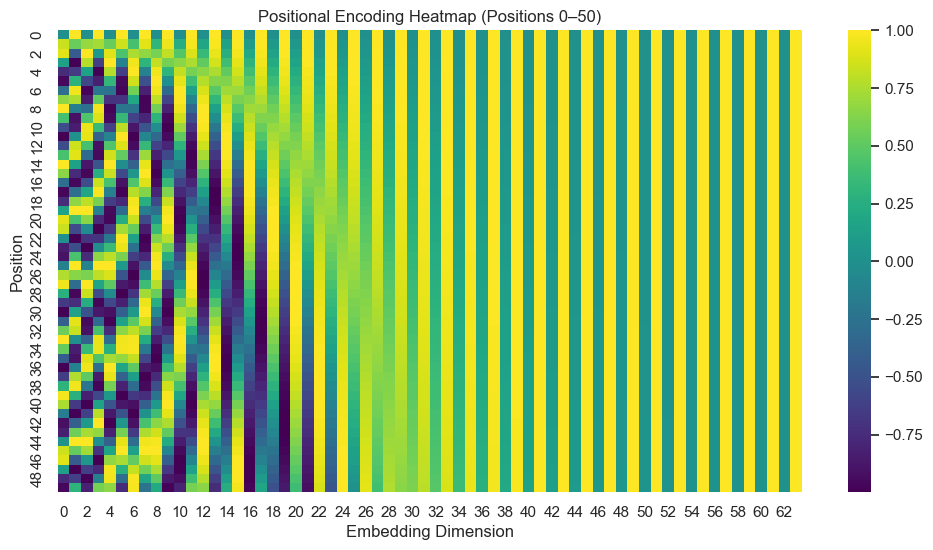

In [8]:
plt.figure(figsize=(12, 6))
plt.title("Positional Encoding Heatmap (Positions 0–50)")
sns.heatmap(PE, cmap="viridis")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.show()

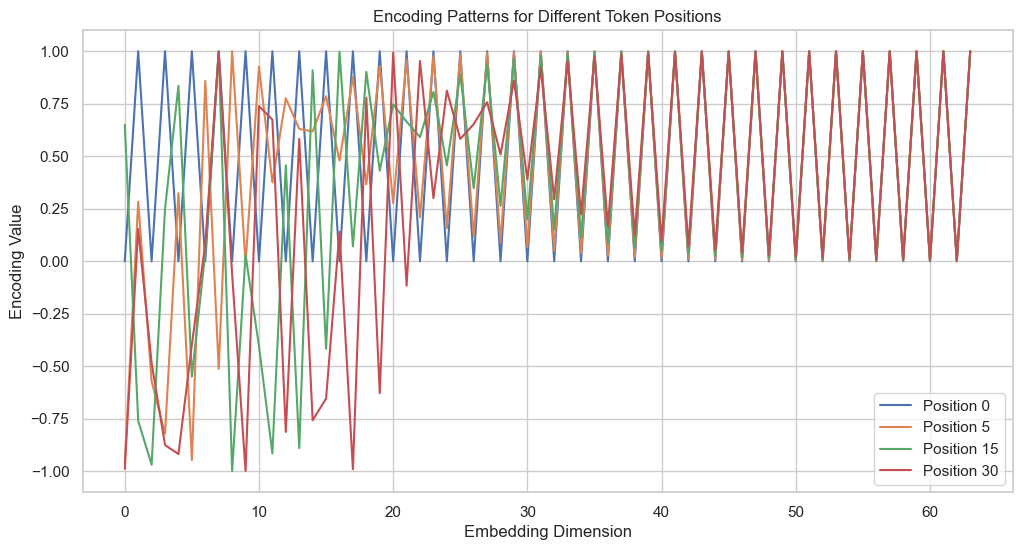

In [9]:
plt.figure(figsize=(12, 6))
for pos in [0, 5, 15, 30]:
    plt.plot(PE[pos].numpy(), label=f"Position {pos}")

plt.title("Encoding Patterns for Different Token Positions")
plt.xlabel("Embedding Dimension")
plt.ylabel("Encoding Value")
plt.legend()
plt.show()

C:\Users\ttaul\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


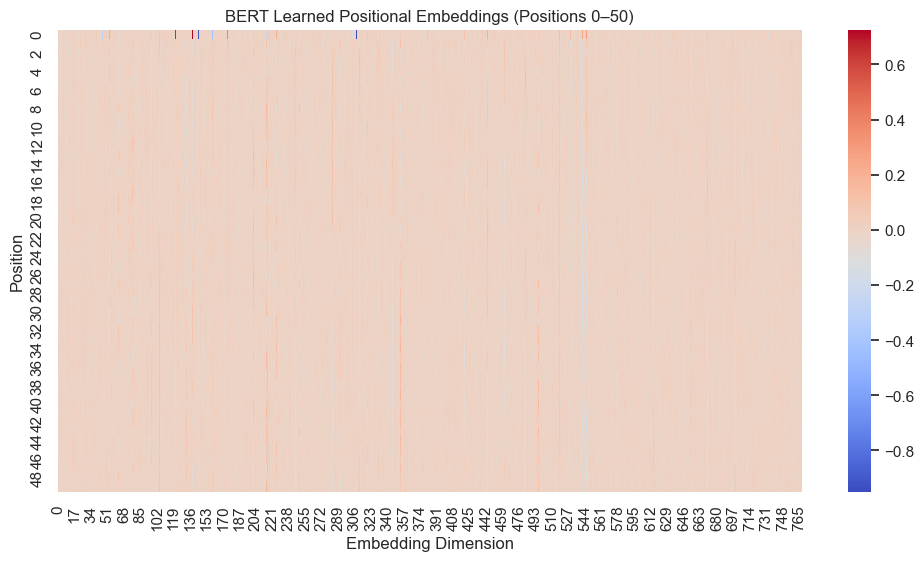

In [10]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

bert_positional = model.embeddings.position_embeddings.weight.data[:50]

plt.figure(figsize=(12, 6))
sns.heatmap(bert_positional, cmap="coolwarm")
plt.title("BERT Learned Positional Embeddings (Positions 0–50)")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.show()